In [1]:
import sys
sys.path.append('../src')

import os

In [2]:
from read_data import Data
from analysis import analysis
from predictions import predict
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
model_path = '/users/rkakodka/Automated_analysis_of_zebrafish/testing_zebrafish_video-Rohit-2020-10-05/exported-models/DLC_testing_zebrafish_video_resnet_50_iteration-0_shuffle-1/snapshot-300000.pb'
image_folder = os.path.join(os.getcwd(), '..', 'data/96_well_plate/images/')
images = Data(image_folder + 'IMG_%04d.JPG')
experiment = analysis(images)
infer = predict(images, experiment, model_path)

In [4]:
sess, output, input = infer.get_session()

In [5]:
ret, frame, img_no = images.read()

In [6]:
wells = experiment.detect_wells(R = [72, 108], image=frame)

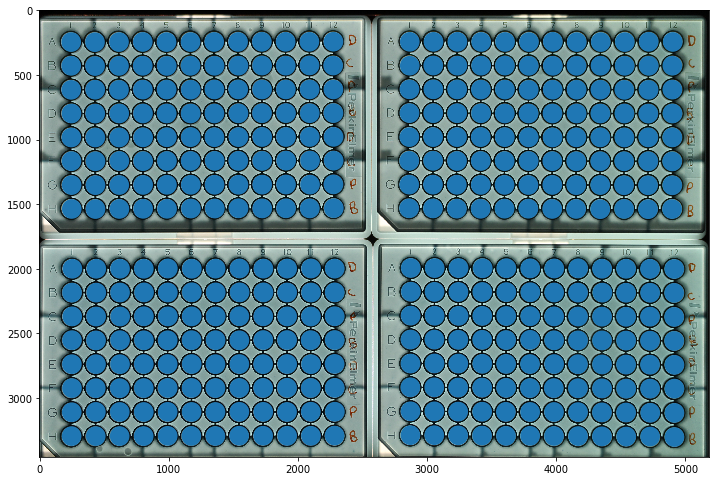

In [7]:
experiment.plot_wells(image = frame, wells = wells)

In [9]:
def predict_image(image, wells, sess, input, output):

    well_ind, data = experiment.crop_wells(wells, image)
    predictions = sess.run(output, feed_dict = {input : data})
    
    predictions = np.asarray(predictions).reshape(3, len(wells), 3)
    predictions = (predictions.view([(f'f{i}',predictions.dtype) 
                                     for i in range(predictions.shape[-1])])[...,0].astype('O'))
    
    predicted_image = pd.DataFrame(predictions.transpose(), columns = ['right_eye', 'left_eye', 'yolk'], 
                                   index = pd.MultiIndex.from_tuples(well_ind))
    
    return predicted_image

predicted_image = predict_image(frame, wells, sess, input, output)

In [15]:
%%time

predictions = infer.predict(wells = wells)

Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
CPU times: user 9min 19s, sys: 1min 23s, total: 10min 43s
Wall time: 23min 39s


In [17]:
predictions.head()

right_eye  \
1 0.0 0.0   (57.63148880004883, 143.48391723632812, 1.0)   
      1.0      (53.906005859375, 138.4169464111328, 1.0)   
      2.0   (68.83793640136719, 128.65655517578125, 1.0)   
      4.0  (23.438861846923828, 103.61992645263672, 1.0)   
      3.0  (18.267671585083008, 100.82817840576172, 1.0)   

                                              left_eye  \
1 0.0 0.0  (144.64576721191406, 97.2708511352539, 1.0)   
      1.0  (138.7498016357422, 99.19406127929688, 1.0)   
      2.0  (133.7547149658203, 81.70164489746094, 1.0)   
      4.0  (27.30500030517578, 43.67189025878906, 1.0)   
      3.0  (31.74713134765625, 39.49943923950195, 1.0)   

                                                    yolk  
1 0.0 0.0  (57.181678771972656, 17.134418487548828, 1.0)  
      1.0   (60.25175857543945, 12.376078605651855, 1.0)  
      2.0    (72.5090560913086, 23.918872833251953, 1.0)  
      4.0    (12.491125106811523, 71.3790283203125, 1.0)  
      3.0    (17.026702880859375, 66.9466323852539, 1.0)

In [12]:
predicted_image

right_eye  \
0.0  0.0    (57.63148880004883, 143.48391723632812, 1.0)   
     1.0       (53.906005859375, 138.4169464111328, 1.0)   
     2.0    (68.83793640136719, 128.65655517578125, 1.0)   
     4.0   (23.438861846923828, 103.61992645263672, 1.0)   
     3.0   (18.267671585083008, 100.82817840576172, 1.0)   
...                                                  ...   
23.0 8.0    (82.24252319335938, 144.37657165527344, 1.0)   
     12.0   (81.79354858398438, 122.36901092529297, 1.0)   
     13.0   (104.31425476074219, 18.33517074584961, 1.0)   
     14.0  (108.86698150634766, 22.217174530029297, 1.0)   
     15.0    (57.6668701171875, 126.60701751708984, 1.0)   

                                               left_eye  \
0.0  0.0    (144.64576721191406, 97.2708511352539, 1.0)   
     1.0    (138.7498016357422, 99.19406127929688, 1.0)   
     2.0    (133.7547149658203, 81.70164489746094, 1.0)   
     4.0    (27.30500030517578, 43.67189025878906, 1.0)   
     3.0    (31.74713134765625, 39.49943923950195, 1.0)   
...                                                 ...   
23.0 8.0    (87.5887222290039, 11.443998336791992, 1.0)   
     12.0   (89.59732818603516, 31.29233169555664, 1.0)   
     13.0  (139.15631103515625, 84.46981048583984, 1.0)   
     14.0    (136.7027587890625, 90.4758529663086, 1.0)   
     15.0  (122.02293395996094, 82.23275756835938, 1.0)   

                                                    yolk  
0.0  0.0   (57.181678771972656, 17.134418487548828, 1.0)  
     1.0    (60.25175857543945, 12.376078605651855, 1.0)  
     2.0     (72.5090560913086, 23.918874740600586, 1.0)  
     4.0     (12.491125106811523, 71.3790283203125, 1.0)  
     3.0     (17.026702880859375, 66.9466323852539, 1.0)  
...                                                  ...  
23.0 8.0     (68.57696533203125, 6.482687473297119, 1.0)  
     12.0     (79.4678955078125, 17.57693862915039, 1.0)  
     13.0  (31.317276000976562, 121.75299835205078, 1.0)  
     14.0  (26.878787994384766, 115.00289154052734, 1.0)  
     15.0   (41.57748031616211, 106.23764038085938, 1.0)  

[384 rows x 3 columns]

In [9]:
%%time

well_ind, data = experiment.crop_wells(wells, frame)

CPU times: user 84.4 ms, sys: 49.2 ms, total: 134 ms
Wall time: 135 ms


In [17]:
%%time

predictions = sess.run(output, feed_dict = {input : data})

CPU times: user 77.8 ms, sys: 10.4 ms, total: 88.2 ms
Wall time: 342 ms


In [18]:
%%time
predictions = np.asarray(predictions).reshape(3, len(wells), 3)
predictions = (predictions.view([(f'f{i}',predictions.dtype) 
                                     for i in range(predictions.shape[-1])])[...,0].astype('O'))
    
predicted_image = pd.DataFrame(predictions.transpose(), columns = ['right_eye', 'left_eye', 'yolk'], 
                                   index = pd.MultiIndex.from_tuples(well_ind))

CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 2.05 ms
